# 50 ddim steps

In [ ]:
from tambo_3D_diffusion_generator import PlaneDiffusionEvaluator
import torch


# Initialize with custom parameters
generator = PlaneDiffusionEvaluator(
    data_dir =  "/n/netscratch/arguelles_delgado_lab/Everyone/hhanif/tambo_simulation_nov_25/pre_processed_3rd_step/",
    checkpoint_path =  "/n/netscratch/arguelles_delgado_lab/Everyone/hhanif/tambo_simulation_nov_25/checkpoints/tam_unet/epoch_epoch=1229-val_loss_val_loss=0.0333.ckpt",
    output_dir="3D_diffusion_model/run_1",
    ddim_steps =  50,
    eta =  0.0,
    guidance_w =  1.8,
    imports_path = "/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_optimization/unet"
    )

Initialized PlaneDiffusionEvaluator
Device: cuda:0
Output directory: 3D_diffusion_model/run_1


In [2]:
generator.load_model()
(energy, class_id, sin_z, cos_z, sin_a, cos_a) = (0.2398,  1.0000,  0.6737, -0.7390, -0.3746, -0.9272)
generator.test_conditions = torch.tensor([[energy, class_id, sin_z, cos_z, sin_a, cos_a]])


Model parameters: 12,408,387
Loaded checkpoint: /n/netscratch/arguelles_delgado_lab/Everyone/hhanif/tambo_simulation_nov_25/checkpoints/tam_unet/epoch_epoch=1229-val_loss_val_loss=0.0333.ckpt
DDIM sampler built (ddim_steps=50, eta=0.0, w=1.8)
Model loading time: 0.93s


In [3]:
outputs = generator.generate_samples(num_samples=1, num_conditions=1, chunk_size=100)

✔ Done: generated 1 images across 1 conditions.
Total generation time: 34.85s


In [4]:
outputs[0]['images'].shape

torch.Size([1, 24, 3, 32, 32])

p_energy: 0.23980000615119934
class_id: 1.0
sin_z: 0.6736999750137329
cos_z: -0.7390000224113464
sin_a: -0.37459999322891235
cos_a: -0.9272000193595886


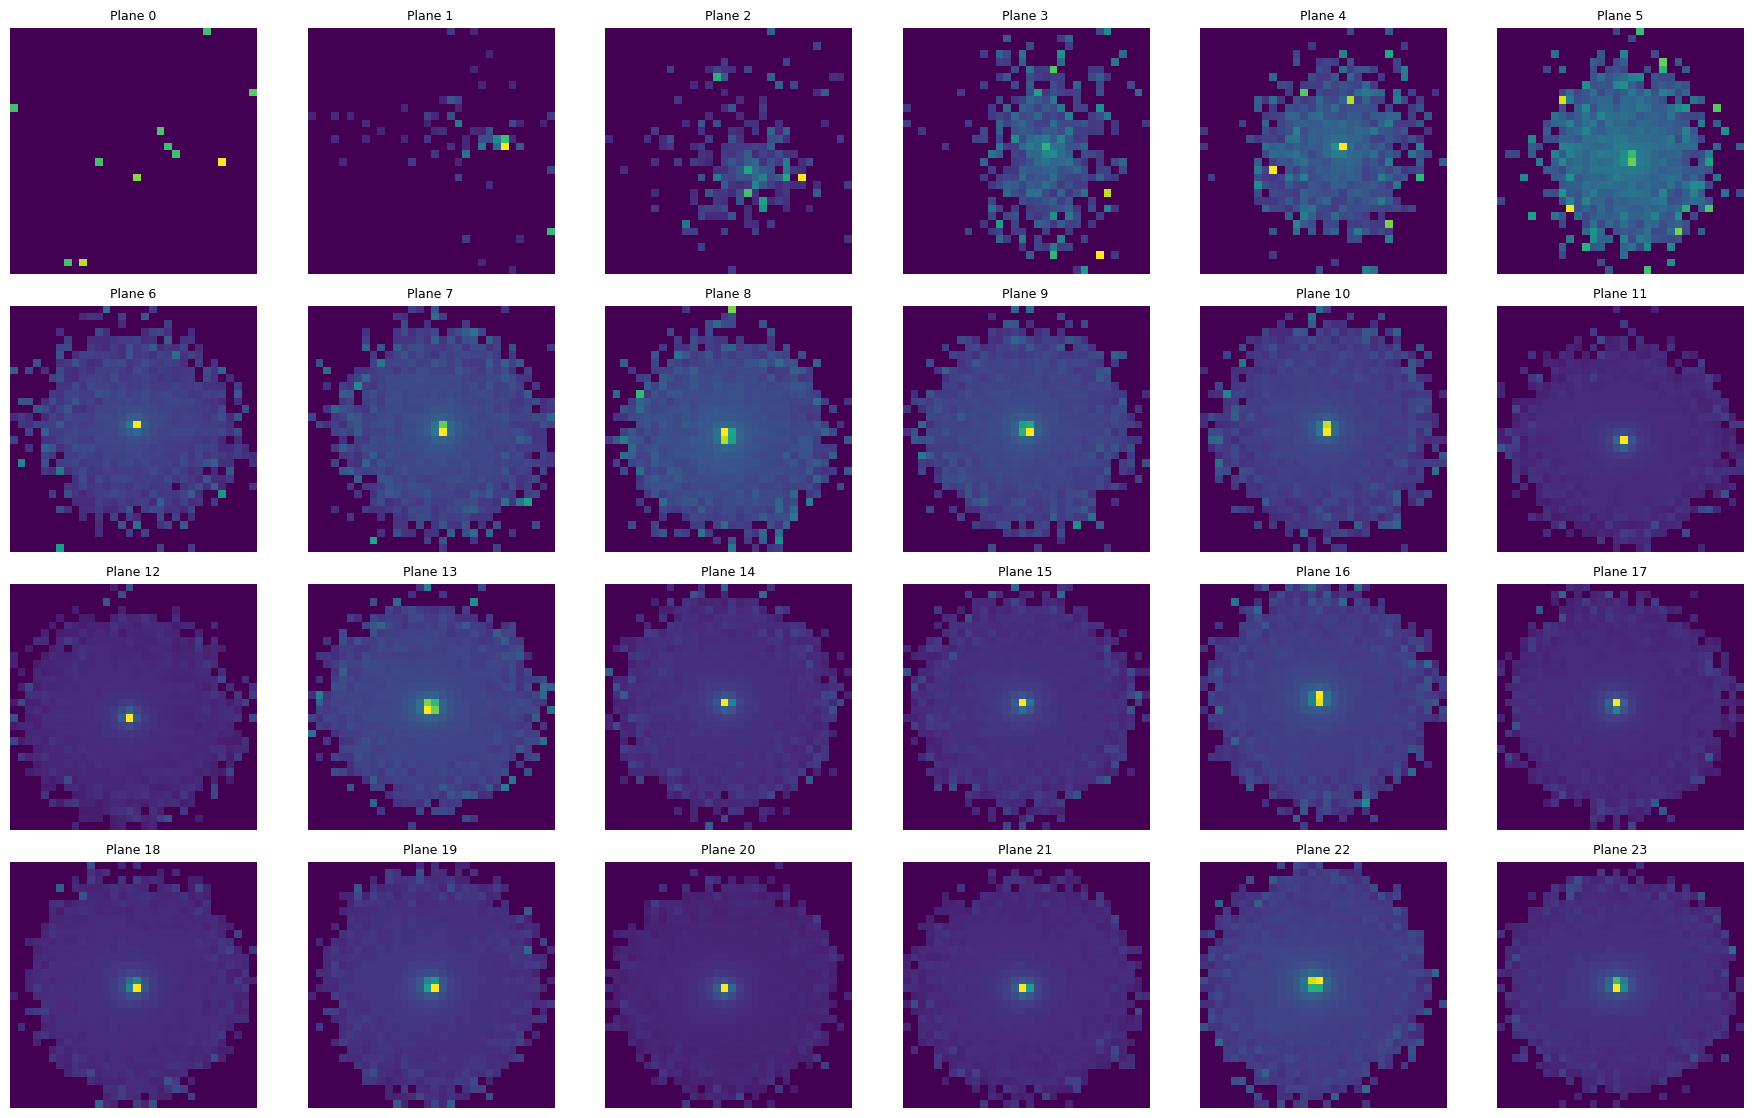

In [10]:
import matplotlib.pyplot as plt


for output in outputs:
    condition_name = [ 'p_energy', 'class_id', 'sin_z', 'cos_z', 'sin_a', 'cos_a' ]
    for icondition, condition in enumerate(output['condition']):
        print(f"{condition_name[icondition]}: {condition}")

    output_images = output['images'].squeeze().mean(dim=1)
    
    # Plot all 24 planes
    fig, axes = plt.subplots(4, 6, figsize=(18, 12))
    
    for plane_idx in range(24):
        ax = axes[plane_idx // 6, plane_idx % 6]
        plane_data = output_images[plane_idx].cpu().numpy()
        # Normalize to [0, 1]
        plane_data = (plane_data - plane_data.min()) / (plane_data.max() - plane_data.min())
        ax.imshow(plane_data, cmap='viridis', vmin=0, vmax=1)
        ax.set_title(f"Plane {plane_idx}", fontsize=9)
        ax.axis('off')
        # ax.cbar
    
    plt.tight_layout(rect=(0, 0.03, 1, 0.97))
    break

In [11]:
# # plot average values accorss x and y profile
# import numpy as np
# import matplotlib.pyplot as plt
# import torch

# for output in outputs:
#     images = output['images']  # Shape: (N, C, H, W)
#     images_np = images.cpu().numpy().squeeze()

#     avg_x_profile = images_np.mean(axis=(0, 1))  # Average over N and C -> Shape: (H, W)
#     avg_y_profile = images_np.mean(axis=(0, 1)).T  # Transpose to get Y profile

#     plt.figure(figsize=(12, 5))

#     plt.subplot(1, 2, 1)
#     plt.title('Average X Profile')
#     plt.plot(avg_x_profile)
#     plt.xlabel('X Position')
#     plt.ylabel('Average Intensity')

#     plt.subplot(1, 2, 2)
#     plt.title('Average Y Profile')
#     plt.plot(avg_y_profile)
#     plt.xlabel('Y Position')
#     plt.ylabel('Average Intensity')

#     plt.tight_layout()
#     plt.show()
#     break

In [12]:
# generator.plot_xy_profiles(num_conditions=5)

# 5 ddim steps

In [23]:
from tambo_3D_diffusion_generator import PlaneDiffusionEvaluator
import torch


# Initialize with custom parameters
generator = PlaneDiffusionEvaluator(
    data_dir =  "/n/netscratch/arguelles_delgado_lab/Everyone/hhanif/tambo_simulation_nov_25/pre_processed_3rd_step/",
    checkpoint_path =  "/n/netscratch/arguelles_delgado_lab/Everyone/hhanif/tambo_simulation_nov_25/checkpoints/tam_unet/epoch_epoch=1229-val_loss_val_loss=0.0333.ckpt",
    output_dir="3D_diffusion_model/run_1",
    ddim_steps =  5,
    eta =  0.0,
    guidance_w =  1.8,
    imports_path = "/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_optimization/unet"
    )

Initialized PlaneDiffusionEvaluator
Device: cuda:0
Output directory: 3D_diffusion_model/run_1


In [24]:
generator.load_model()
(energy, class_id, sin_z, cos_z, sin_a, cos_a) = (0.2398,  1.0000,  0.6737, -0.7390, -0.3746, -0.9272)
generator.test_conditions = torch.tensor([[energy, class_id, sin_z, cos_z, sin_a, cos_a]])


Model parameters: 12,408,387
Loaded checkpoint: /n/netscratch/arguelles_delgado_lab/Everyone/hhanif/tambo_simulation_nov_25/checkpoints/tam_unet/epoch_epoch=1229-val_loss_val_loss=0.0333.ckpt
DDIM sampler built (ddim_steps=5, eta=0.0, w=1.8)
Model loading time: 0.65s


In [29]:
outputs = generator.generate_samples(num_samples=1, num_conditions=1, chunk_size=1)

✔ Done: generated 1 images across 1 conditions.
Total generation time: 3.83s


In [30]:
outputs[0]['images'].shape

torch.Size([1, 24, 3, 32, 32])

p_energy: 0.23980000615119934
class_id: 1.0
sin_z: 0.6736999750137329
cos_z: -0.7390000224113464
sin_a: -0.37459999322891235
cos_a: -0.9272000193595886


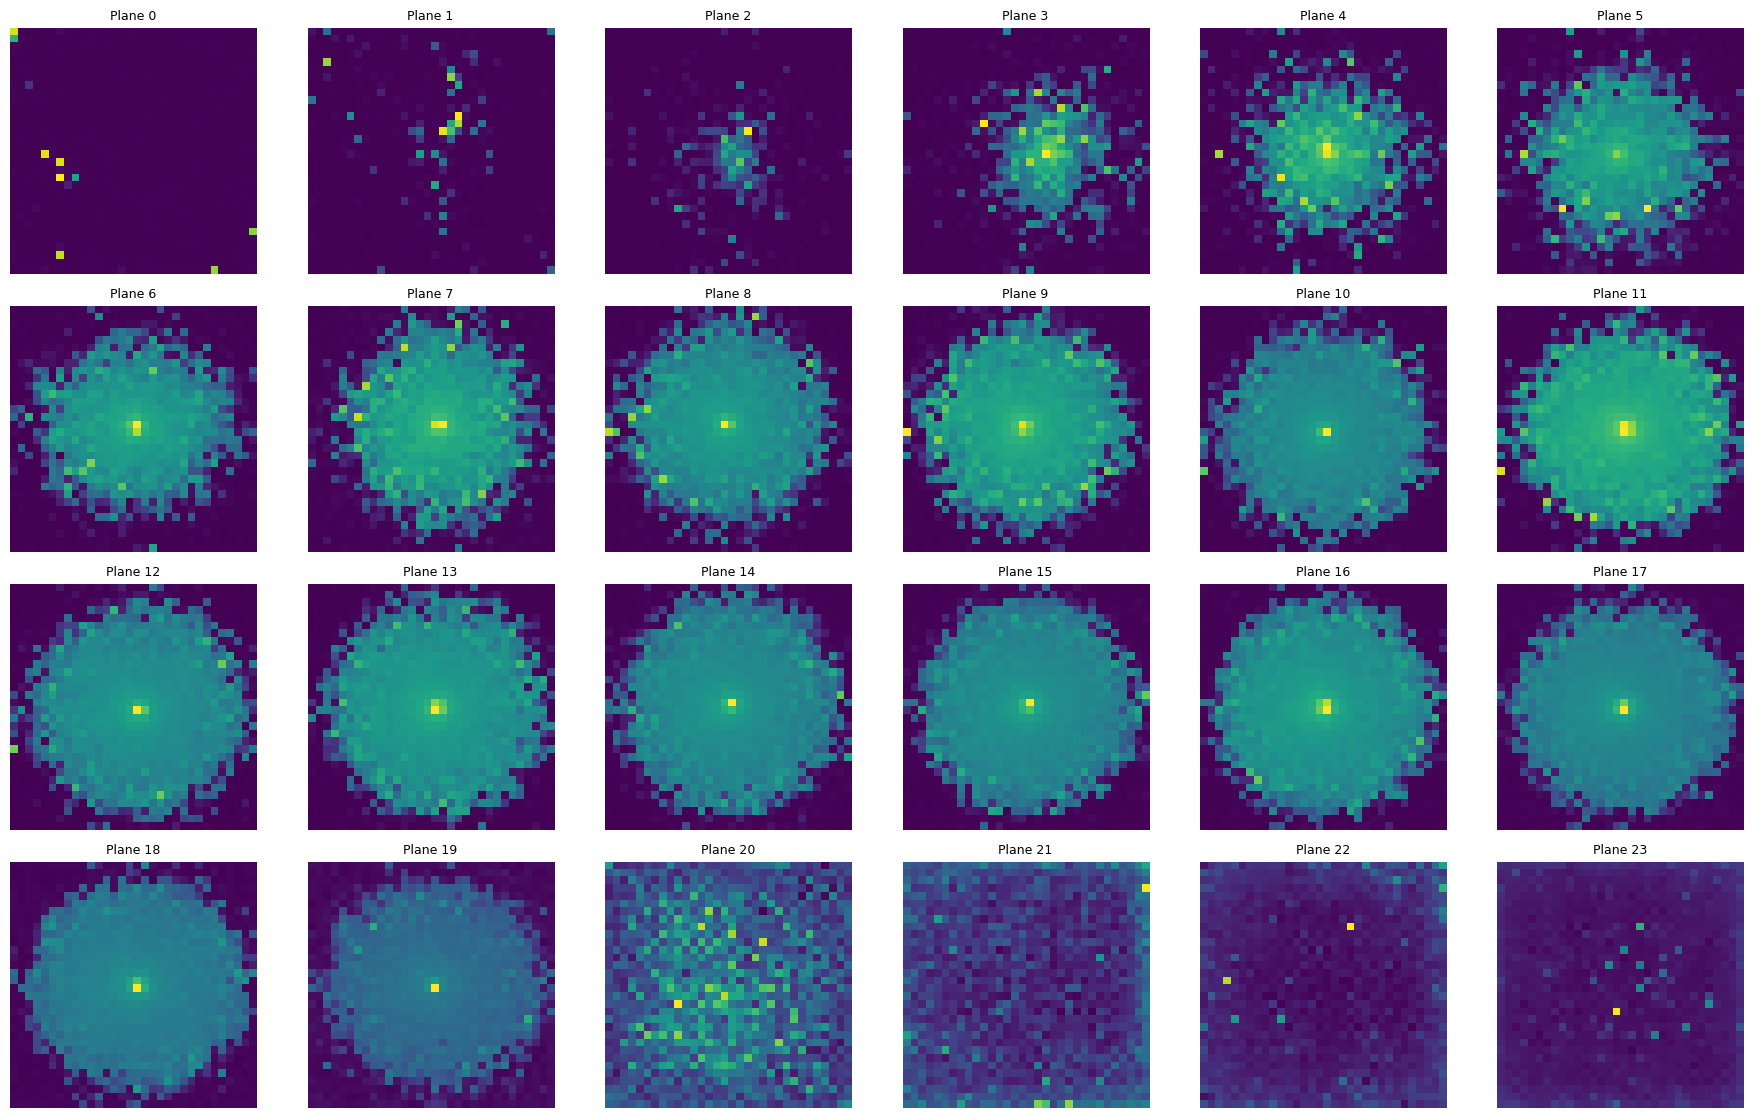

In [31]:
import matplotlib.pyplot as plt


for output in outputs:
    condition_name = [ 'p_energy', 'class_id', 'sin_z', 'cos_z', 'sin_a', 'cos_a' ]
    for icondition, condition in enumerate(output['condition']):
        print(f"{condition_name[icondition]}: {condition}")

    output_images = output['images'].squeeze().mean(dim=1)
    
    # Plot all 24 planes
    fig, axes = plt.subplots(4, 6, figsize=(18, 12))
    
    for plane_idx in range(24):
        ax = axes[plane_idx // 6, plane_idx % 6]
        plane_data = output_images[plane_idx].cpu().numpy()
        # Normalize to [0, 1]
        plane_data = (plane_data - plane_data.min()) / (plane_data.max() - plane_data.min())
        ax.imshow(plane_data, cmap='viridis', vmin=0, vmax=1)
        ax.set_title(f"Plane {plane_idx}", fontsize=9)
        ax.axis('off')
        # ax.cbar
    
    plt.tight_layout(rect=(0, 0.03, 1, 0.97))
    break